*This is a piece of code to convert our Excel spreadsheets into the 80 column MPC format required for find_orb.*

Import modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions

Object and observatory details

In [6]:
object = '2001 QQ142'
obs_code = 995

Reads Excel file into relevantly named txt file in correct find_orb format and returns the pandas dataframe produced in the process

In [7]:
df = functions.read_from_excel(f'{object}', 995)
df

,Date + Time,Exp time,RA,RA in Degrees,RMS_X,FWHM_x (as),object counts,mean count,background pp,Readout Noise pp,...,Dec,Dec in Degrees,RMS_Y,FWHM_y,SNR.1,sigma_AST.1,Dec err (as),Saturated?,Telescope,Observatory
0,2024-01-06T20:01:44.899,30.0,10:55:58.384,163.993267,0.158,3.91,7377.6,44.660,2481.00,8.0,...,48:52:06.41,733.026708,0.165,3.34,11.279648,0.125736,0.207448,N,Draco2,995.0
1,2024-01-12T22:15:29.395,60.0,10:49:41.127,162.421363,0.126,3.38,16030.0,67.760,1340.50,8.0,...,51:33:43.46,773.431083,0.063,3.31,27.161966,0.051746,0.081527,N,Draco2,995.0
2,2024-01-17T18:33:03,90.0,10:42:10.003,160.541679,0.181,4.79,18474.0,201.620,5576.50,8.0,...,52:57:15.42,794.314250,0.154,4.16,25.250038,0.069958,0.169145,N,Draco2,995.0
3,2024-01-30T20:31:02.7344,90.0,10:16:22.713,154.094638,0.108,4.32,14498.0,50.329,3801.80,18.0,...,54:07:22.38,811.843250,0.129,2.96,13.218320,0.095088,0.160258,N,East16,995.0
4,2024-02-03T02:54:32.712,90.0,10:09:43.340,152.430583,0.062,1.76,2035.0,24.000,57.68,8.0,...,53:55:22.71,808.844625,0.033,1.97,18.309980,0.045686,0.056358,N,LaPalma,950.0
5,2024-02-03T22:30:32.269,90.0,10:08:08.774,152.036558,0.136,3.35,9160.0,49.820,2082.70,8.0,...,53:50:16.93,807.570542,0.107,3.99,14.413917,0.117544,0.158951,N,Draco2,995.0
6,2024-02-11T20:45:52.395,90.0,09:54:00.239,148.500996,0.221,3.40,5184.1,88.345,2093.30,8.0,...,52:34:12.42,788.551750,0.056,2.42,14.280951,0.071956,0.091179,N,West 14,995.0
7,2024-02-07T19:48:31.026,180.0,10:00:49.753,150.207304,0.230,3.13,5073.7,178.160,11976.00,8.0,...,53:19:18.00,799.825000,0.096,1.55,8.601310,0.076520,0.122765,N,Draco2,995.0
8,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotting Dec vs RA for the given object

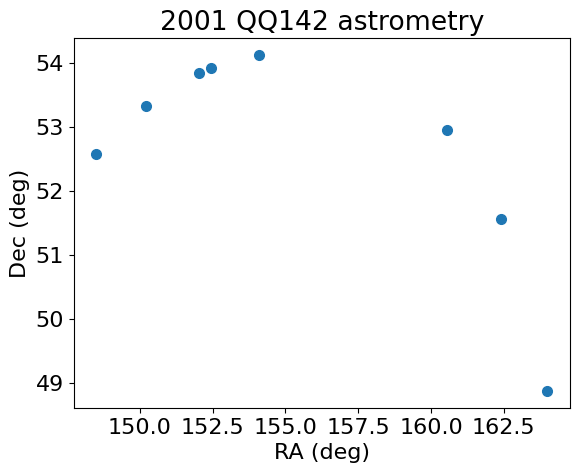

In [8]:
#setting some parameters for the plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 7})

observatories = []
RA_err_deg = []
RA_deg = []
for i in range(0, len(df['RA'])):
    RA = str(df['RA'][i])
    RA_err = df['RA err (as)'][i]
    if RA != 'nan':
        RA_deg.append(functions.RA_to_deg(RA))
        RA_err_deg.append(float(RA_err)*15/3600)
        try:
            observatories.append(df['Observatory'][i])
        except:
            observatories.append(995)

Dec_err_deg = []
Dec_deg = []
for i in range(0, len(df['Dec'])):
    Dec = str(df['Dec'][i])
    Dec_err = df['Dec err (as)'][i]
    if Dec != 'nan':
        Dec_deg.append(functions.dec_to_deg(Dec))
        Dec_err_deg.append(float(Dec_err)/3600)

plt.errorbar(RA_deg, Dec_deg, xerr = RA_err_deg, yerr = Dec_err_deg, marker = 'o', capsize=3, linestyle = 'None')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title(f'{object} astrometry')
plt.savefig(f'plots/{object}_astrometry', bbox_inches='tight')
plt.show()
plt.close()